In [16]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
def load_data():
    # 加载手写数字识别数据集
    digits = load_digits()

    # 获取特征和标签
    X = digits.data
    y = digits.target.reshape(-1, 1)

    # 数据归一化处理
    X = X / 16.0

    # 划分训练集和测试集
    ratio = 0.8
    offset = int(X.shape[0] * ratio)
    training_data = np.hstack((X[:offset], y[:offset]))
    test_data = np.hstack((X[offset:], y[offset:]))

    return training_data, test_data


[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     1.    ]
 [0.     0.     0.     ... 0.5625 0.     2.    ]
 ...
 [0.     0.     0.6875 ... 0.     0.     9.    ]
 [0.     0.     0.125  ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.4375 0.     1.    ]]


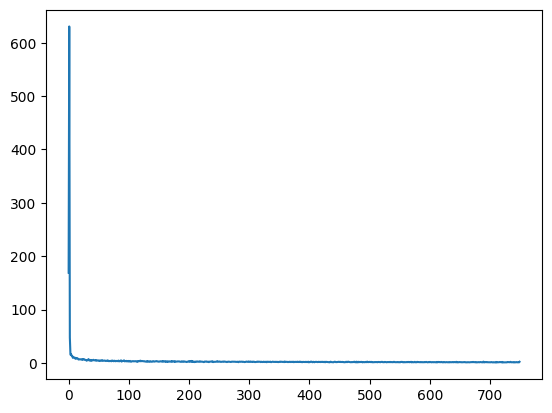

In [17]:
import pickle
import numpy as np

class Network2(object): # 两层神经网络
    def __init__(self, num_of_inputs, num_of_hidden, num_of_outputs):
        # 初始化，如果是要两层的话
        self.w1 = np.random.randn(num_of_inputs,num_of_hidden) # 13*13
        self.b1 = np.zeros(num_of_hidden)
        self.w2 = np.random.randn(num_of_hidden,num_of_outputs)
        self.b2 = 0.
    
    def forward(self, x):
        # 前向就是xvw+b
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) +self.b2
        return self.z2

    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        thea2 = self.z2 - y # 这一行是原来那个底下的
        gradient_w2 = np.dot(self.a1.T,thea2)
        gradient_b2 = np.sum(thea2,axis=0)
        # 这里梯度要经过一个逆向求解
        thea1 = np.dot(thea2, self.w2.T) * (1 - np.power(self.a1, 2))
        gradient_w1 = np.dot(x.T, thea1)
        gradient_b1 = np.sum(thea1,axis=0)
        return gradient_w1, gradient_b1, gradient_w2, gradient_b2
    
    
    def update(self, gradient_w1, gradient_b1,gradient_w2, gradient_b2, eta = 0.01):
        
        self.w1 = self.w1 - eta * gradient_w1
        self.b1 = self.b1 - eta * gradient_b1
        

    def save_model(self, file_path):
        model_state = {
            'w1': self.w1,
            'b1': self.b1,
            'w2': self.w2,
            'b2': self.b2
        }
        with open(file_path, 'wb') as f:
            pickle.dump(model_state, f)

    @staticmethod
    def load_model(file_path):
        with open(file_path, 'rb') as f:
            model_state = pickle.load(f)
        num_of_inputs = model_state['w1'].shape[0]
        num_of_hidden = model_state['w1'].shape[1]
        num_of_outputs = model_state['w2'].shape[1]
        net = Network2(num_of_inputs, num_of_hidden, num_of_outputs)
        net.w1 = model_state['w1']
        net.b1 = model_state['b1']
        net.w2 = model_state['w2']
        net.b2 = model_state['b2']
        return net

    def predict(self, x):
        z = self.forward(x)
        y_pred = np.argmax(z, axis=1)
        return y_pred       
    def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            np.random.shuffle(training_data)
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                X = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                z = self.forward(X)
                loss = self.loss(z, y)
                gradient_w1, gradient_b1, gradient_w2, gradient_b2 = self.gradient(X, y)
                self.update(gradient_w1, gradient_b1, gradient_w2, gradient_b2, eta)
                losses.append(loss)
                #print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                                    #format(epoch_id, iter_id, loss))
        return losses


# 获取数据
train_data, test_data = load_data()

print(train_data)
# 创建网络
net = Network2(64,64,1)
# 启动训练
losses = net.train(train_data, num_epochs=50, batch_size=100, eta=0.001)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

In [18]:
net.save_model('model.pkl')

In [19]:
net = Network2.load_model('model.pkl')
x = test_data[:,:-1]
print(test_data[:,-1:])
y_pred = net.predict(x)
print(y_pred)

[[2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]
 [0.]
 [9.]
 [5.]
 [5.]
 [6.]
 [5.]
 [0.]
 [9.]
 [8.]
 [9.]
 [8.]
 [4.]
 [1.]
 [7.]
 [7.]
 [3.]
 [5.]
 [1.]
 [0.]
 [0.]
 [2.]
 [2.]
 [7.]
 [8.]
 [2.]
 [0.]
 [1.]
 [2.]
 [6.]
 [3.]
 [3.]
 [7.]
 [3.]
 [3.]
 [4.]
 [6.]
 [6.]
 [6.]
 [4.]
 [9.]
 [1.]
 [5.]
 [0.]
 [9.]
 [5.]
 [2.]
 [8.]
 [2.]
 [0.]
 [0.]
 [1.]
 [7.]
 [6.]
 [3.]
 [2.]
 [1.]
 [7.]
 [4.]
 [6.]
 [3.]
 [1.]
 [3.]
 [9.]
 [1.]
 [7.]
 [6.]
 [8.]
 [4.]
 [3.]
 [1.]
 [4.]
 [0.]
 [5.]
 [3.]
 [6.]
 [9.]
 [6.]
 [1.]
 [7.]
 [5.]
 [4.]
 [4.]
 [7.]
 [2.]
 [8.]
 [2.]
 [2.]
 [5.]
 [7.]
 [9.]
 [5.]
 [4.]
 [8.]
 [8.]
 [4.]
 [9.]
 [0.]
 [8.]
 [9.]
 [8.]
 [0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]
 [0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [9.]
 [0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]
 [0.]
 [9.]
 [5.]
 [5.]
 [6.]
 [5.]
 [0.]
 [9.]
 [8.]
 [9.]
 [8.]
 [4.]
 [1.]
 [7.]
 [7.]
 [3.]
 [5.]
 [1.]
 [0.]
 [0.]
 [2.]
 [2.]
 [7.]
 [8.]
 [2.]
 [0.]
 [1.]
 [2.]
 [6.]
 [3.]
 [3.

(64, 1) 0.004989536723748673
(64, 1) 0.010065515405225304
(64, 1) 0.014745269686282874
(64, 1) 0.019791741916923355
(64, 1) 0.024502306166570238
(64, 1) 0.028862872115110065
(64, 1) 0.03322686085642203
(64, 1) 0.03792297464158586
(64, 1) 0.04283074848370137
(64, 1) 0.047388122397473
(64, 1) 0.052104452839699625
(64, 1) 0.056997223091805584
(64, 1) 0.06103396992777881
(64, 1) 0.06588630852795563
(64, 1) 0.07030655315552627
(64, 1) 0.07436532480043594
(64, 1) 0.07859125058389407
(64, 1) 0.08282719511101375
(64, 1) 0.08693432956310826
(64, 1) 0.0908912589037242
(64, 1) 0.09530431618985774
(64, 1) 0.09893962149855294
(64, 1) 0.10282314820841673
(64, 1) 0.1064781255194914
(64, 1) 0.11027179120652529
(64, 1) 0.1142552999352044
(64, 1) 0.11836096233024468
(64, 1) 0.12225549822100394
(64, 1) 0.12594042344547435
(64, 1) 0.1294348167055532
(64, 1) 0.13287305492132606
(64, 1) 0.13623626196368113
(64, 1) 0.1394531095193398
(64, 1) 0.14284819932222192
(64, 1) 0.14671672844318828
(64, 1) 0.150390554

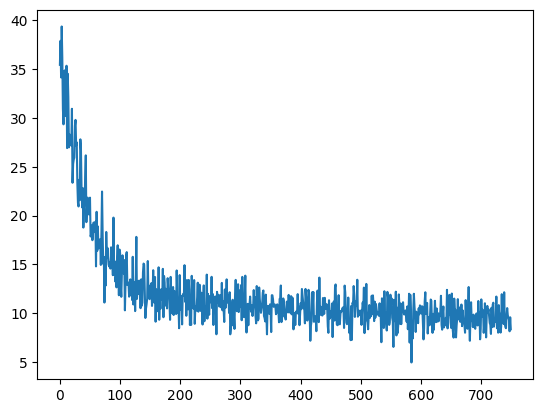

In [20]:
import numpy as np

class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        #np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        N = x.shape[0]
        gradient_w = 1. / N * np.sum((z-y) * x, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = 1. / N * np.sum(z-y)
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
        print(self.w.shape, self.b)
            
                
    def train(self, training_data, num_epochs, batch_size=10, eta=0.1):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            # 在每轮迭代开始之前，将训练数据的顺序随机打乱
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                #print(self.w.shape)
                #print(self.b)
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                a = self.forward(x)
                loss = self.loss(a, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                # print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                #                  format(epoch_id, iter_id, loss))
        
        return losses

# 获取数据
train_data, test_data = load_data()

# 创建网络
net = Network(64)
# 启动训练
losses = net.train(train_data, num_epochs=50, batch_size=100, eta=0.001)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()